In [5]:
# 🧪 Use Case Matters
# Use Case	Target MAE / RMSE	Notes
# 📊 Trend Analysis	MAE < 2.0	OK to be approximate
# 📈 Policy Simulation	MAE < 1.5	Needs precision
# 🔍 Short-Term Price Prediction	MAE < 1.0	Very sensitive
# 💼 Long-term Forecasting	RMSE < 2.5	Slight error tolerable

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv("CPI.csv")
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df = df[['Date', 'Combined']].rename(columns={'Date': 'ds', 'Combined': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(df)

# Forecasting future CPI for 5 years (monthly)
future = model.make_future_dataframe(periods=60, freq='MS')
forecast = model.predict(future)

# Evaluation on available known data
actual = df['y']
predicted = model.predict(df[['ds']])['yhat']

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print("Prophet Forecasting:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

01:23:33 - cmdstanpy - INFO - Chain [1] start processing
01:23:33 - cmdstanpy - INFO - Chain [1] done processing


Prophet Forecasting:
MAE: 0.62
MSE: 0.66
RMSE: 0.81


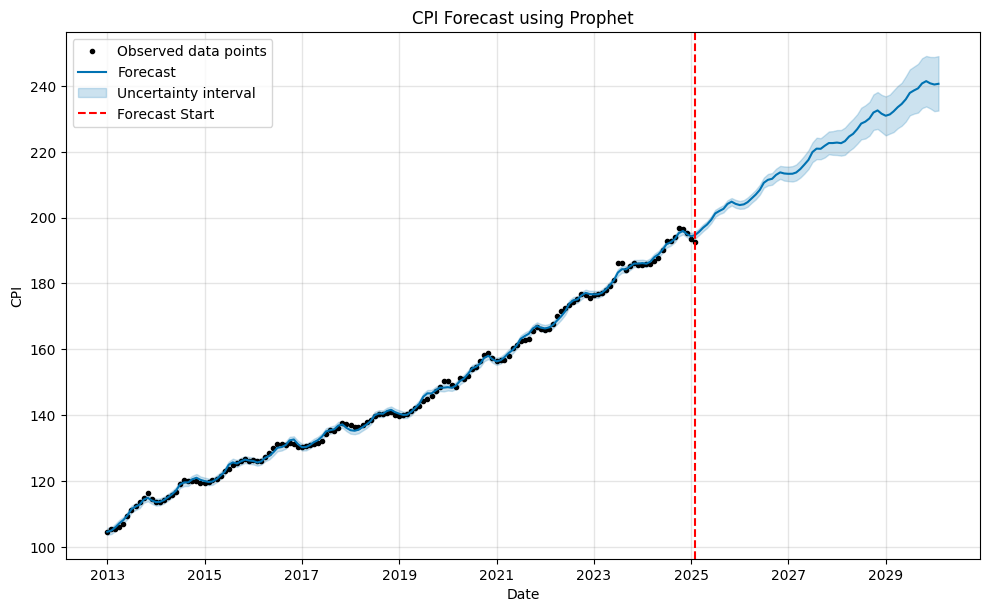

In [9]:
# Plot the forecast
fig = model.plot(forecast)
plt.title("CPI Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.axvline(x=df['ds'].iloc[-1], color='r', linestyle='--', label="Forecast Start")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# -----------------------------
# Calculate Annual Inflation Rate
# -----------------------------
# Get CPI at current date and CPI after N years
current_cpi = forecast[forecast['ds'] == df['ds'].iloc[-1]]['yhat'].values[0]


# -----------------------------
# Investment Return Calculator
# -----------------------------
# User input
investment_amount =100000
rd_return = 6.5
fd_return = 7.2
years = 3
future_cpi = forecast[forecast['ds'] == df['ds'].iloc[-1] + pd.DateOffset(years=years)]['yhat'].values[0]

# Compound Annual Growth Rate (Inflation Rate)
inflation_rate = ((future_cpi / current_cpi) ** (1 / years) - 1) * 100
print(f"Estimated Annual Inflation Rate (CAGR over {years} years): {inflation_rate:.2f}%")

# Nominal returns
rd_nominal = investment_amount * ((1 + rd_return / 100) ** years)
fd_nominal = investment_amount * ((1 + fd_return / 100) ** years)

# Real return = (1 + nominal) / (1 + inflation) - 1
rd_real = ((1 + rd_return / 100) / (1 + inflation_rate / 100)) ** years - 1
fd_real = ((1 + fd_return / 100) / (1 + inflation_rate / 100)) ** years - 1

rd_real_amt = investment_amount * (1 + rd_real)
fd_real_amt = investment_amount * (1 + fd_real)

# -----------------------------
# Final Output
# -----------------------------
print("\n--- Investment Returns Adjusted for Inflation ---")
print(f"RD Nominal Return after {years} years: ₹{rd_nominal:,.2f}")
print(f"FD Nominal Return after {years} years: ₹{fd_nominal:,.2f}")
print(f"\nAssumed Inflation Rate: {inflation_rate:.2f}%")
print(f"RD Real Return (adjusted for inflation): ₹{rd_real_amt:,.2f}")
print(f"FD Real Return (adjusted for inflation): ₹{fd_real_amt:,.2f}")

Estimated Annual Inflation Rate (CAGR over 3 years): 4.56%

--- Investment Returns Adjusted for Inflation ---
RD Nominal Return after 3 years: ₹120,794.96
FD Nominal Return after 3 years: ₹123,192.52

Assumed Inflation Rate: 4.56%
RD Real Return (adjusted for inflation): ₹105,658.31
FD Real Return (adjusted for inflation): ₹107,755.44
